In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
df = df.rename(columns={'label': 'status'})

df = df[['status', 'message']]

df.head()

,status,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

Shape: (5572, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   status   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Missing values:
 status     0
message    0
dtype: int64


In [15]:
print(df['status'].value_counts())


status
ham     4825
spam     747
Name: count, dtype: int64


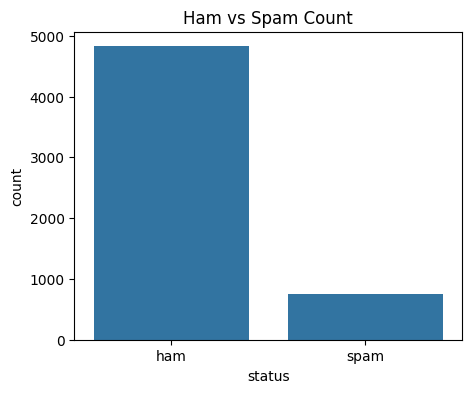

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='status')
plt.title("Ham vs Spam Count")
plt.show()


In [17]:
df['message_length'] = df['message'].apply(len)

df[['status', 'message_length']].groupby('status').mean()


,message_length
status,
ham,71.023627
spam,138.866131


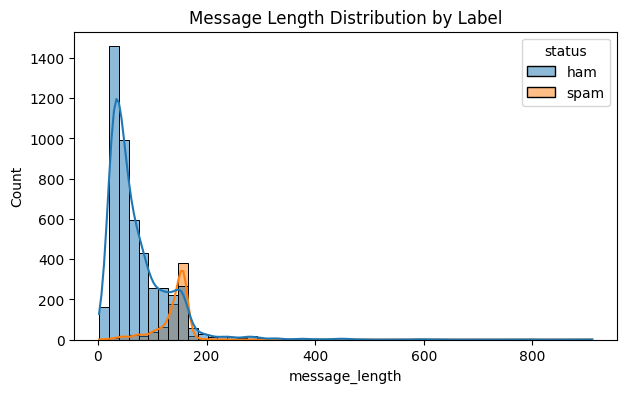

In [18]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='message_length', hue='status', bins=50, kde=True)
plt.title("Message Length Distribution by Label")
plt.show()


In [19]:
X = df['message']   # text
y = df['status']     # 'ham' or 'spam'


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 4457
Test size: 1115


In [21]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',   # remove common English words
        max_df=0.9,             # ignore very frequent terms
        min_df=5                # ignore very rare terms
    )),
    ('clf', LogisticRegression(max_iter=1000))
])


In [22]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

In [23]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9748878923766816

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



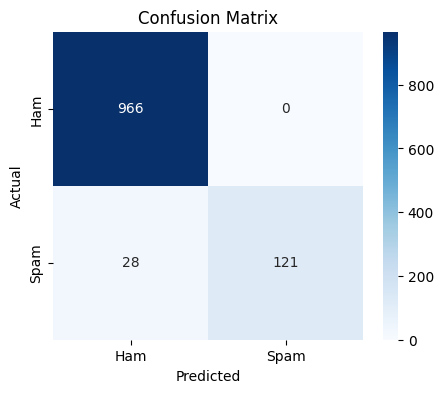

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

plt.figure(figsize=(5,4))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
sample_messages = [
    "Congratulations! You've won a free lottery ticket. Click here to claim now.",
    "Hey, are we still meeting for lunch tomorrow?",
    "URGENT! Your account has been compromised, send your password immediately.",
    "Hi Mom, I reached safely. Talk to you later."
]

predictions = model.predict(sample_messages)

for msg, label in zip(sample_messages, predictions):
    print(f"Message: {msg}\nPredicted label: {label}\n")

Message: Congratulations! You've won a free lottery ticket. Click here to claim now.
Predicted label: spam

Message: Hey, are we still meeting for lunch tomorrow?
Predicted label: ham

Message: URGENT! Your account has been compromised, send your password immediately.
Predicted label: ham

Message: Hi Mom, I reached safely. Talk to you later.
Predicted label: ham



### ✅ Conclusion

In this project, I built an email/SMS spam detection model using Machine Learning.

Steps performed:
- Loaded and cleaned the SMS spam dataset
- Kept only two main columns: label (ham/spam) and message
- Explored label distribution and message length patterns
- Converted text messages into numerical vectors using TF-IDF
- Trained a Logistic Regression classifier
- Evaluated the model using accuracy, classification report, and confusion matrix
- Tested the model on custom messages

The model is able to classify messages as spam or non-spam (ham) with high accuracy.  
This task helped me understand text preprocessing, TF-IDF representation, and applying Machine Learning to NLP problems.
